In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

def coin_flips(n=10000, odds=1.97, bankroll=100, stake=1, bankrupt=False): 
    '''
    Simulates 1000 coinflips for a single punter, betting at 1.97 odds, 
    also calculates net winnnigs 
    
    NEW: default bankroll and stake set 100 and 1, respectively
    now also calculates if player went bankrupt or not
    '''
    
    ## create a pandas dataframe for storing coin flip results 
    ## and calculate net winnings 
    df = pd.DataFrame()
    ## insert n number of coinflips, 0=loss, 1=win 
    df['result'] = np.random.randint(2, size=n)
    ## calculate net winnings 
    df['net'] = np.where(df['result'] == 1, stake*odds - stake, -stake)
    ## calculate cumulative net winnings 
    df['cum_net'] = df['net'].cumsum()
    ## calculate total bankroll 
    df['bankroll'] = df['cum_net'] + bankroll 
    ## if bankrooll goes below the default stake, punter will stop betting 
    ## count times bankroll < stake 
    df['bankrupt'] = np.where(df['bankroll'] < stake, 1, 0)
    ## count cummulative bankruptcies, with columns shifted one step down 
    df['bankruptcies'] = df['bankrupt'].cumsum().shift(1)
    ## in case first flip is a loss, bankrupties will be NaN, replace with 0. 
    df.fillna(0, inplace=True)
    ## drop all flips after first bankruptcy 
    if bankrupt: 
        df = df[df['bankruptcies'] == 0]
    return df 


In [25]:
coin_flips()

,result,net,cum_net,bankroll,bankrupt,bankruptcies
0,0,-1.00,-1.00,99.00,0,0.0
1,0,-1.00,-2.00,98.00,0,0.0
2,0,-1.00,-3.00,97.00,0,0.0
3,1,0.97,-2.03,97.97,0,0.0
4,0,-1.00,-3.03,96.97,0,0.0
...,...,...,...,...,...,...
9995,0,-1.00,-108.57,-8.57,1,3550.0
9996,1,0.97,-107.60,-7.60,1,3551.0
9997,1,0.97,-106.63,-6.63,1,3552.0
9998,1,0.97,-105.66,-5.66,1,3553.0


In [26]:
def many_coin_flips(punters=100, n=10000, odds=1.97, bankroll=100, 
                    stake=1, color='r', plot=False,bankrupt=False): 
    '''
    Simulates 1000 coinflips for 100 different punters, 
    all betting at 1.97 odds, 
    also calculates and plots net winnings for each punter 
    
    NEW: now also saves punter bankruptcies 
    '''
    
    ## create pandas dataframe for storing punter results 
    punter_df = pd.DataFrame()
    ## loop through all punters 
    for i in np.arange(punters): 
        ## simulate coin flips 
        df = coin_flips(n,odds,bankroll,stake,bankrupt)
        ## calculate net 
        net = df['net'].sum()
        ## check for bankruptcy 
        bankruptcy = df['bankrupt'].sum()
        
        ## append to our punter dataframe 
        punter_df = punter_df.append({'odds':odds, 
                                     'net':net, 
                                     'bankrupt': bankruptcy}, 
                                    ignore_index=True)
        
        if plot: 
            ## plot the cummulative winnings over time 
            df['cum_net'].plot(color=color, alpha=0.1)
            
    ## check if punters ended up in profit 
    punter_df['winning'] = np.where(punter_df['net'] > 0, 1, 0)
    
    return punter_df

In [27]:
many_coin_flips()

,bankrupt,net,odds,winning
0,5896.0,-333.21,1.97,0
1,3542.0,-193.34,1.97,0
2,1582.0,-16.04,1.97,0
3,1893.0,-126.36,1.97,0
4,4588.0,-120.45,1.97,0
...,...,...,...,...
95,6727.0,-252.44,1.97,0
96,6975.0,-205.16,1.97,0
97,2257.0,-167.73,1.97,0
98,2958.0,-175.61,1.97,0


In [28]:
def compare_odds(punters=100, n=10000, odds=[1.97, 2.00, 2.03]): 
    '''
    Simulates and compare coin flip net winnings 
    after 10000 flips for 3 groups of punters, 
    bettings at odds of 1.97, 2.00 and 2.03, respectively. 
    Also plots every punters net winnings 
    '''
    
    ## create figure and ax objects to plot on 
    fig, ax = plt.subplots()
    
    ## set y coordinates for annotating text for each group for punters 
    ys = [0.25,  0.5, 0.75]
    ##  assign colors to each group of punters 
    cs = ['r', 'y', 'g']
    
    ## loop through the groups of punters, with their respective odds, 
    ## chosen color and y for annotating text 
    
    for odd, color, y in zip(odds, cs, ys): 
        ## run  the coin flip simulation with given odds, plot with chosen color 
        df = many_coin_flips(punters, n, odd, color=color, plot=True)
        ## calculate how many punters in the group ended up in profit 
        winning_punters = df['winning'].mean()
        ## set a text to annotate 
        win_text = '%.2f: %.0f%%' %(odd, winning_punters * 100)
        ## annotate odds and chance of profit for each group of punters 
        ax.annotate(win_text, xy=(1.02, y), 
                    xycoords='axes fraction', color=color, va='center')
    
    
    ## set title 
    ax.set_title('Chances of ending up in profit after %s coin flips' %n)
    ## set x and y axis labels 
    ax.set_xlabel('Number of flips')
    ax.set_ylabel('Net profit')
    
    ## add annotatioin 'legend'
    ax.annotate('odds : chance', xy = (1.03, 1.0), 
               xycoords = ('axes fraction'), fontsize = 10, va='center')
    
    ## add horizontal line at breakeven point
    plt.axhline(color='k', alpha=0.5)
    ## set y axis range at some nice number 
    ax.set_ylim(-450, 450)
    
    ## show plot 
    plt.show()

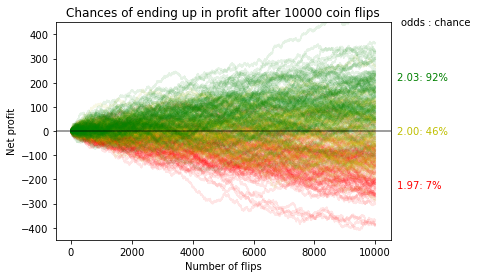

In [29]:
compare_odds()

In [20]:
def compare_stakes(punters=200,n=10000,odds=2.03,stakes=[100,50,25,10,5,2,1,0.5],bankroll=100):
    '''
    Similar to compare_odds, but here we instead want to compare different
    staking sizes for our coin flips betting at 2.03 odds
 
    Increased number of punters in each group, from 100 to 200
 
    Also prints out the results
    '''
 
    ## pandas df to store results
    results_df = pd.DataFrame(columns=['stake','win','lose','bankrupt'])
 
    ## colors to use in plot later, green=1=win, yellow=4=lost, red=2=bankrupt
    colors = [sns.color_palette()[i] for i in (1,4,2)]
 
    ## loop through the groups of punters, with their respective odds
    for stake in stakes:
        ## run coin flip simulation with given stake
        df = many_coin_flips(punters,n,odds,stake=stake,bankrupt=True)
        ## calculate how many punters in the group ended up in profit
        winning_punters = df['winning'].mean()
        ## ...and how many went bankrupt
        bankrupt_punters = df['bankrupt'].mean()
        # lost money but not bankrupt
        lose = 1 - winning_punters - bankrupt_punters
 
        ## append to dataframe
        results_df = results_df.append({'stake':stake,
                                        'win':winning_punters,
                                        'lose':lose,
                                        'bankrupt':bankrupt_punters},ignore_index=True)
 
    ## set stake as index
    results_df.set_index('stake',inplace=True)
 
    ## plot
    fig = plt.figure()
    ## create ax object
    ax = results_df.plot(kind='bar',stacked=True,color=colors,alpha=0.8)
    ## fix title, axis labels etc
    ax.set_title('Simulation results: betting %s coin flips at %s odds, starting bankroll %s' %(n,odds,bankroll))
    ax.set_ylabel('%')
    ## set legend outside plot
    ax.legend(bbox_to_anchor=(1.2,0.5))
 
    ## add percentage annotation for both win and bankrupt
    for x, w, l, b in zip(np.arange(len(results_df)),results_df['win'],results_df['lose'],results_df['bankrupt']):
        ## calculate y coordinates
        win_y = w/2
        lost_y = w + l/2
        bankr_y = w + l + b/2
 
        ## annotate win, lose and bankrupt %, only if >=2%
        if w >= 0.04:
            ax.annotate('%.0f%%' %(w * 100),xy=(x,win_y),va='center',ha='center')
        if l >= 0.04:
            ax.annotate('%.0f%%' %(l * 100),xy=(x,lost_y),va='center',ha='center')
        if b >= 0.04:
            ax.annotate('%.0f%%' %(b * 100),xy=(x,bankr_y),va='center',ha='center')
 
    plt.show()

<Figure size 432x288 with 0 Axes>

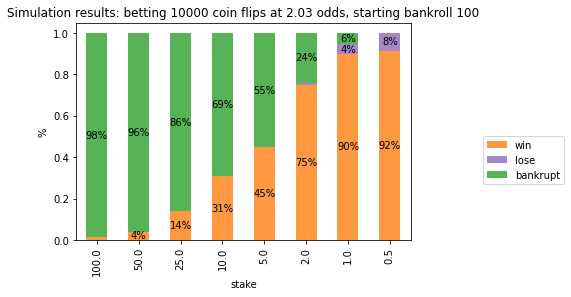

In [21]:
compare_stakes()

### References: 

1. https://taketheshot.co/2017/03/20/stake-sizing-part-1/


## SCALE MATTERS – HOW TO NOT TRACK YOUR BETTING RESULTS

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()

def coin_flips(n=10000, odds=1.97, bankroll=100, stake=1, bankrupt=False): 
    '''
    Simulates 10000 coinflips for a single punter, betting at 1.97 odds, 
    also calculates net winnings 
    
    NEW: default bankroll and stake set at 100 and 1, respectively now also 
    calculates if player went bankrupt or not 
    '''
    
    ## create a pandas dataframe for storing coin flip results 
    ## and calculate net winnigns 
    df = pd.DataFrame()
    ## insert n number of coinflips, 0=loss, 1=win
    df['result'] = np.random.randint(2, size=n)
    ## calculate net winnigns 
    df['net'] = np.where(df['result'] == 1, stake*odds - stake, -stake)
    ## calculate cummulative net winnings 
    df['cum_net'] = df['net'].cumsum()
    
    ## calculate total bankroll 
    df['bankroll'] = df['cum_net'] + bankroll 
    
    ## if bankroll goes below the default stake, punter will stop betting 
    ## count times bankroll < stake 
    
    df['bankrupt'] = np.where(df['bankroll'] < stake, 1, 0)
    ## count cummulative bankruptices, with column shift one step down 
    df['bankruptcies'] = df['bankrupt'].cumsum().shift(1)
    ## in case first flip is a loss , bankruptcies will be NaN, replace with 0 
    df.fillna(0, inplace=True)
    ## drop all flips after first bankruptcy 
    if bankrupt: 
        df = df[df['bankruptices'] == 0]
    return df 

def compare_scales(n=10000, odds=2.03, n_day=10, df=False): 
    '''
    Puts coinflips on a timeline to 10/flips per day, 30 days/month
    '''
    
    ## if no df specified, create a new one 
    if not df: 
        ## create df of a single punter's coinflips 
        df = coin_flips(n, odds)
    
    ## calc number of days 
    days = n / n_day 
    ## ... weeks
    weeks = n / (n_day*7)
    ## ... months 
    months = n / (n_day*30)
    ## and years needed 
    years = n / (n_day*365)
    
    
    ## Inset days 
    df['days'] = np.repeat(np.arange(1, days+1), n_day)
    ## ... weeks 
    df['weeks'] = np.repeat(np.arange(1, weeks+2), n_day*7)[:n]
    ## and months 
    df['months'] = np.repeat(np.arange(1, months+2), n_day*30)[:n]
    ## and years 
    df['years'] = np.repeat(np.arange(1, years + 2), n_day*365)[:n]
    
    ## list of scales 
    scales = ['days', 'weeks', 'months', 'years'] 
    
    ## figure, subplots 
    f, axes = plt.subplots(2, len(scales), gridspec_kw={'height_ratios':[len(scales),1]},
                           sharey='row', figsize=(12,6))
    
    ## reorder axes 
    day_axes = [axes[0][0], axes[1][0]] 
    week_axes = [axes[0][1], axes[1][1]]
    month_axes = [axes[0][2], axes[1][2]] 
    year_axes = [axes[0][3], axes[1][3]] 
    
    axes = [day_axes, week_axes, month_axes, year_axes] 
    
    ## Loop through views, groupby and calc cum net, 
    ## plot cum net and 'view' net 
    
    for s, ax in zip(scales, axes): 
        ## groupby, recalc cumnet 
        group = df.groupby(s).sum()
        group['cum_net'] = group['net'].cumsum()
        
        ## Plot total cumulative net as line 
        group['cum_net'].plot(ax=ax[0]) 
        ## and daily/weekly/monthly net as bar 
        group['net'].plot(ax=ax[1], kind='bar',linewidth=0)
        
        ## clean up lower plot x axis 
        ax[1].set_xlabel('')
        ax[1].set_xticklabels('')
        ax[1].grid(False)
        
        ## Insert horizontal\ line at breakeven on both plots, 
        ## add label 
        for i in ax: 
            i.axhline(color='k', alpha=0.5)
            i.set_ylabel('Net profit')
            
    ## fix the yearly y-tick labels to show whole only 
    ax[0].set_xticklabels(['1', '', '2', '', '3'])
    
    ## 'fix' layout 
    plt.tight_layout()
    ## show plot 
    plt.show()

<ipython-input-38-2a5a59a6b526>:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['1', '', '2', '', '3'])


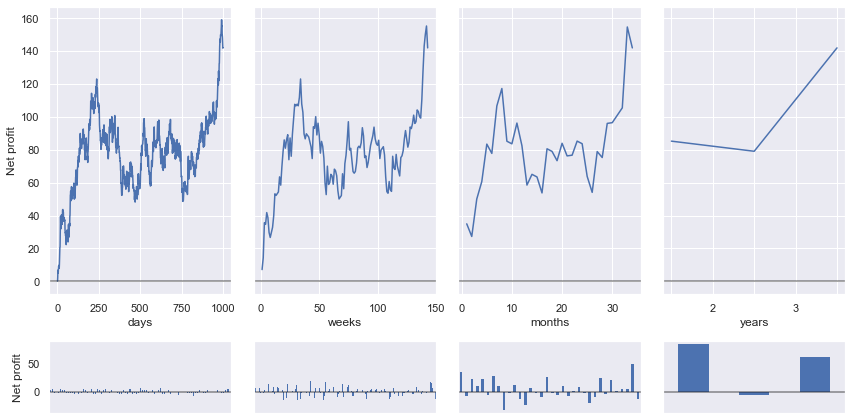

In [39]:
compare_scales()

### References: 
2. https://taketheshot.co/2019/12/30/scale-matters-how-to-not-track-your-betting-results/